Title: Haberman’s Survival Data
Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:
Age of patient at the time of operation (numerical)
Patient’s year of operation (year — 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 years

Referred from https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the dataset

In [2]:
haberman = pd.read_csv('haberman.csv')
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


## Understanding the data

In [3]:
print(haberman.shape)

(306, 4)


In [4]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
count_class=haberman["status"].value_counts()
count_class.plot(kind='bar')
plt.xlabel("Status")
plt.ylabel("Count")
plt.title('Class distribution Histogram')
print(count_class)

1    225
2     81
Name: status, dtype: int64


In [6]:
print(haberman.dtypes)

age       int64
year      int64
nodes     int64
status    int64
dtype: object


## Correlation of independent variable against the class label

Text(0.5,1,'Correlation of independent variable')

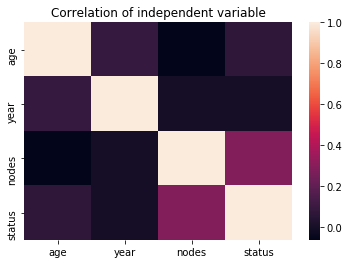

In [7]:
sns.heatmap(haberman.corr())
plt.title('Correlation of independent variable')

In [8]:
haberman['status'] = pd.Categorical(haberman.status)

In [9]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [10]:
haberman.describe()

age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000

### Observations

1. Haberman dataset contains 306 instances and 4 attributes.
2. There are no missing values.
3. The column 'status' is the classification column.
4. There are totally 225 patients with survival status '1' and 81 with survival status '2'. So it is an imbalanced dataset
5. All attributes are of integer type including the classification column. Hence converting the classification column to categorical type.


## Univariate Analysis

To describe, summarize and find patterns for each feature/attribute

## Probability Density Function

### 1 Dimensional density plot

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,size=5,hue="status")\
.map(sns.distplot,'age')\
.add_legend()
plt.title('PDF of Age')

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PDF of Age')

### observation

1. There is a major overlapping observed. 
2. Patients of age between 30 - 40 have high chances of survival, between 40 - 60 have less chances of survival, between 60 - 80 it is equally likely. The results are give just based on the age however it cannot be concluded with just the 'age' parameter.

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,size=5,hue="status")\
.map(sns.distplot,"year")\
.add_legend()
plt.title('PDF of year')

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PDF of year')

### Observation

1. There is a major overlapping observed.
2. There are more unsuccessful operations observed in between the years 1957 mid - 1961, 1963 - 1966 and 1967 - 1968 mid

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PDF of nodes')

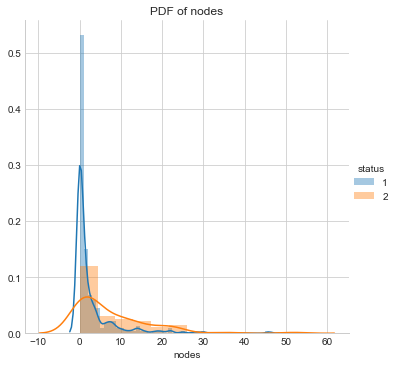

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,size=5,hue='status')\
.map(sns.distplot,'nodes')\
.add_legend()
plt.title('PDF of nodes')

### Observation

1. Patients with number of nodes between 0 - 5 have high chances of survival whereas patients with more than 5 nodes are less likely to survive.

## Cumulative density Function based on Class label

In [14]:
#Getting the subset of dataset w.r.t class label

haberman_1 = haberman.loc[haberman["status"]==1]
haberman_2 = haberman.loc[haberman["status"]==2]
                          

In [16]:
#Age

counts1,bins1 = np.histogram([haberman_1["age"]], density=True)

pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)

print(pdf1)
print(cdf1)

plt.plot(bins1[1:],pdf1, label = '1_pdf')
plt.plot(bins1[1:],cdf1, label = '1_cdf')

counts2, bins2 = np.histogram(haberman_2["age"],density=True)
pdf2 = counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)

print(pdf2)
print(cdf2)

plt.plot(bins2[1:],pdf2, label = '2_pdf')
plt.plot(bins2[1:],cdf2, label = '2_cdf')

plt.xlabel('Age')
plt.legend()
plt.title('CDF of Age')
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


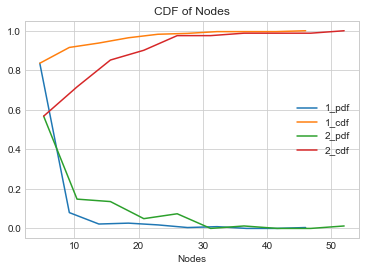

In [17]:
#Nodes

counts1, bins1 = np.histogram(haberman_1["nodes"],density=True,bins=10)

pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)

plt.plot(bins1[1:],pdf1,label='1_pdf')
plt.plot(bins1[1:],cdf1,label='1_cdf')

print(pdf1)
print(cdf1)

counts2, bins2 = np.histogram(haberman_2["nodes"],density=True,bins=10)
pdf2 = counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)

print(pdf2)
print(cdf2)

plt.plot(bins2[1:],pdf2, label = '2_pdf')
plt.plot(bins2[1:],cdf2, label = '2_cdf')

plt.xlabel('Nodes')
plt.legend()
plt.title('CDF of Nodes')
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


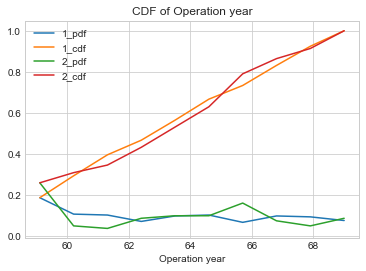

In [19]:
#Operation_year

counts1, bins1 = np.histogram(haberman_1["year"],density=True)

pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)

plt.plot(bins1[1:],pdf1,label='1_pdf')
plt.plot(bins1[1:],cdf1,label='1_cdf')

print(pdf1)
print(cdf1)

counts2, bins2 = np.histogram(haberman_2["year"],density=True)
pdf2 = counts2/sum(counts2)
cdf2 = np.cumsum(pdf2)

print(pdf2)
print(cdf2)

plt.plot(bins2[1:],pdf2, label = '2_pdf')
plt.plot(bins2[1:],cdf2, label = '2_cdf')

plt.xlabel('Operation year')
plt.legend()
plt.title('CDF of Operation year')
plt.show()

## Observations

1. Nearly 82% of the patients who survived have nodes less than 5.

## Box Plot and Violin plot

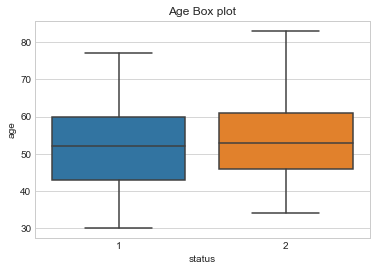

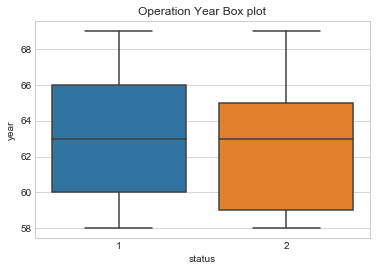

In [20]:
sns.boxplot(data = haberman, x = "status" , y = "age")
plt.title('Age Box plot')
plt.show()

sns.boxplot(data = haberman, x = "status" , y = "year")
plt.title('Operation Year Box plot')
plt.show()

sns.boxplot(data = haberman, x = "status", y = "nodes")
plt.title('Nodes Box plot')
plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


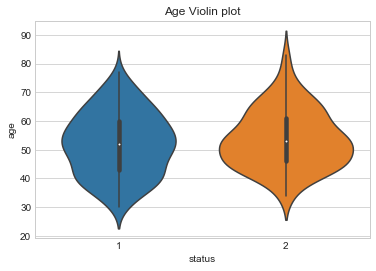

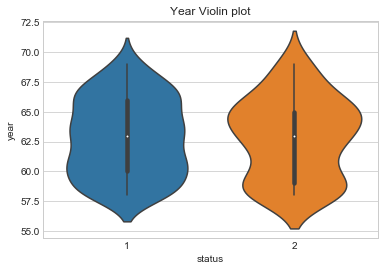

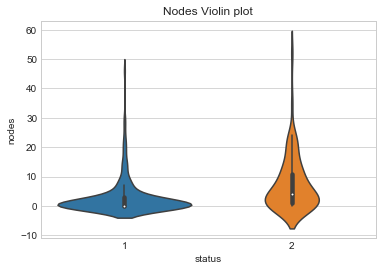

In [21]:
sns.violinplot(data = haberman, x = "status" , y = "age")
plt.title('Age Violin plot')
plt.show()

sns.violinplot(data = haberman, x = "status" , y = "year")
plt.title('Year Violin plot')
plt.show()

sns.violinplot(data = haberman, x = "status", y = "nodes")
plt.title('Nodes Violin plot')
plt.show()

## Observations from the above plots

1. For patients sufferring from the disease who are below 35 years, there is a high chance for survival.
2. Patients suffering from the disease who are above 78 years have a high chance of not surviving.
3. For patients with more than 5 nodes are more likely of not surviving

## Bi-variate Analysis

## 2D Scatter plots

C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

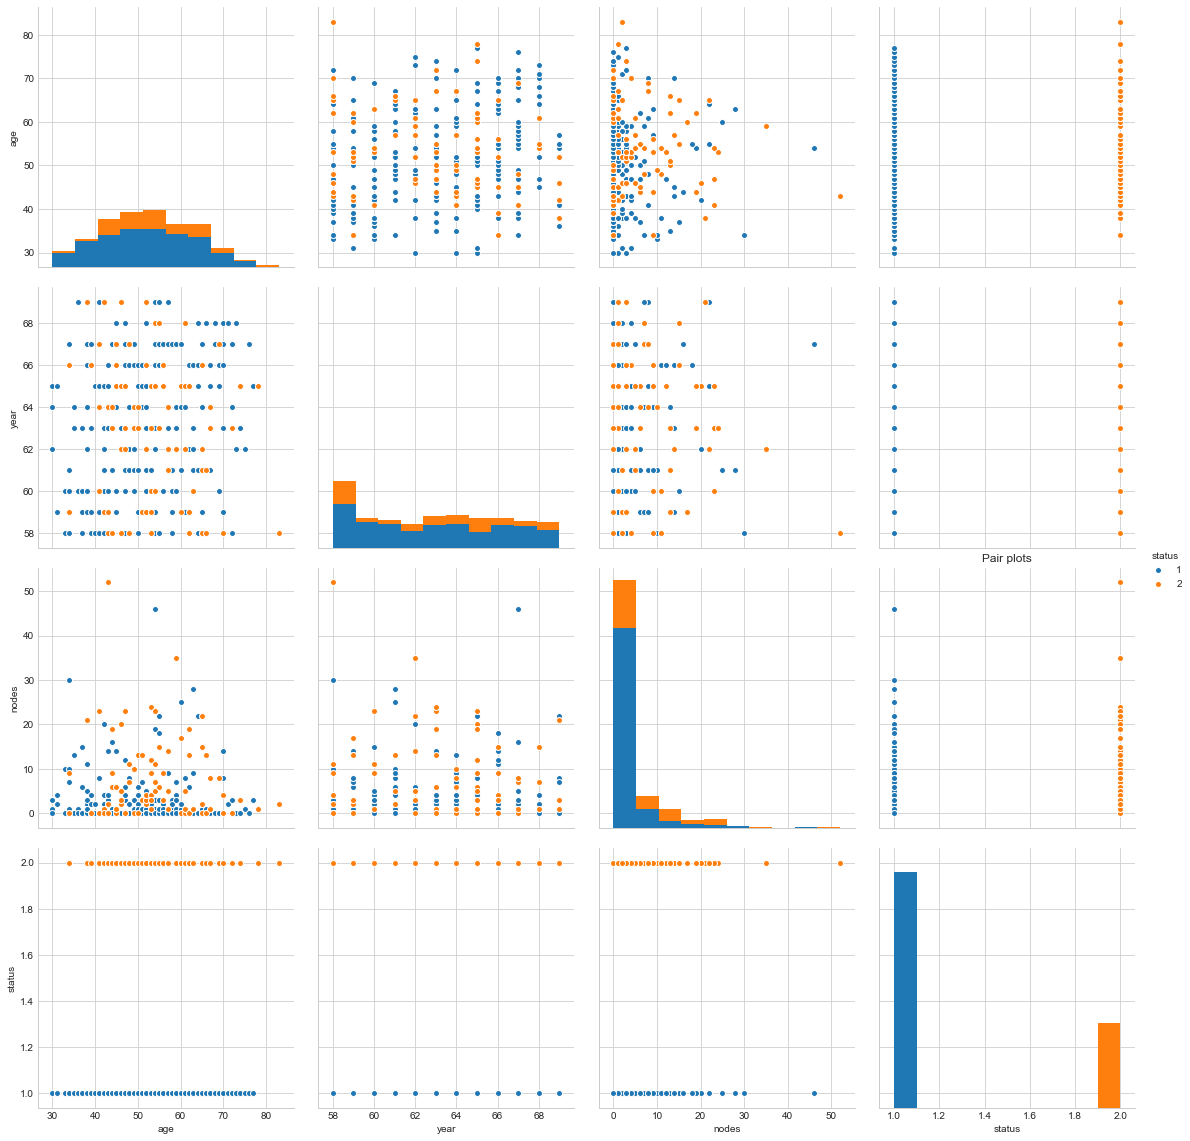

In [22]:
sns.set_style('whitegrid')
sns.pairplot(haberman,size=4,hue="status")
plt.title('Pair plots')
plt.show()

### Observations

1. The plot between year and nodes is better compared to the other two plots.
2. The plots between (nodes and age) and (age and year) are highly merged.

## Multivariate Analysis

### 2 Dimensional density plot

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


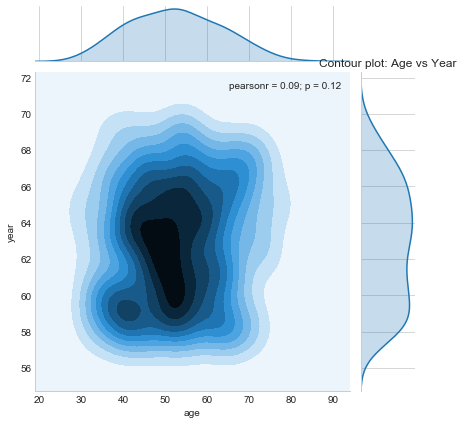

In [23]:
sns.jointplot(data=haberman,x='age',y='year',kind='kde')
plt.title('Contour plot: Age vs Year')
plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


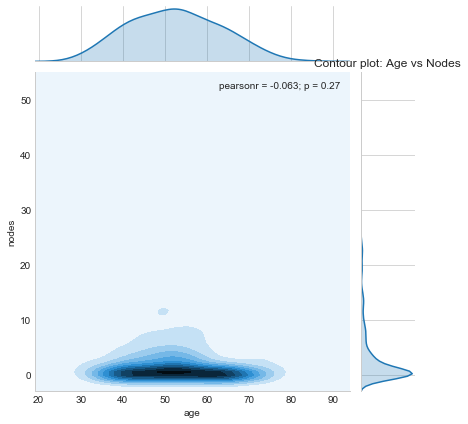

In [24]:
sns.jointplot(data=haberman,x="age",y="nodes",kind="kde")
plt.title('Contour plot: Age vs Nodes')
plt.show()

In [25]:
sns.jointplot(data=haberman,x='year',y='nodes',kind='kde')
plt.title('Contour plot: Year vs Nodes')
plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Observations

1. In the contour plot between age and year, it is observed that more number of operation were done between the year 1959-1964 for the people of age group 45 to 55.
2. There isn't much insights obtained from the other two plots.

## Data description based on class label and attribute

### Mean

#### Age

In [26]:
print("Survival age mean:",np.mean(haberman_1["age"]))
print("Unsurvival age mean:",np.mean(haberman_2["age"]))


Survival age mean: 52.01777777777778
Unsurvival age mean: 53.67901234567901


#### Year

In [27]:
print("Survival year mean:",np.mean(haberman_1["year"]))
print("Unsurvival year mean:",np.mean(haberman_2["year"]))


Survival year mean: 62.86222222222222
Unsurvival year mean: 62.82716049382716


#### Nodes

In [28]:
print("Survival nodes mean:",np.mean(haberman_1["nodes"]))
print("Unsurvival node mean:",np.mean(haberman_2["nodes"]))


Survival nodes mean: 2.7911111111111113
Unsurvival node mean: 7.45679012345679


### Median
#### Age

In [29]:
print("Survival age median:",np.median(haberman_1["age"]))
print("Unsurvival age median:",np.median(haberman_2["age"]))


Survival age median: 52.0
Unsurvival age median: 53.0


#### year

In [30]:
print("Survival year median:",np.median(haberman_1["year"]))
print("Unsurvival year median:",np.median(haberman_2["year"]))


Survival year median: 63.0
Unsurvival year median: 63.0


#### Nodes

In [31]:
print("Survival nodes median:",np.median(haberman_1["nodes"]))
print("Unsurvival nodes median:",np.median(haberman_2["nodes"]))


Survival nodes median: 0.0
Unsurvival nodes median: 4.0


### Standard deviation

#### Age

In [32]:
print("Survival age standard deviation:",np.std(haberman_1["age"]))
print("Unsurvival age standard deviation:",np.std(haberman_2["age"]))


Survival age standard deviation: 10.98765547510051
Unsurvival age standard deviation: 10.10418219303131


#### Year

In [33]:
print("Survival year standard deviation:",np.std(haberman_1["year"]))
print("Unsurvival year standard deviation:",np.std(haberman_2["year"]))


Survival year standard deviation: 3.2157452144021956
Unsurvival year standard deviation: 3.3214236255207883


#### Nodes

In [34]:
print("Survival nodes standard deviation:",np.std(haberman_1["nodes"]))
print("Unsurvival nodes standard deviation:",np.std(haberman_2["nodes"]))


Survival nodes standard deviation: 5.857258449412131
Unsurvival nodes standard deviation: 9.128776076761632


### Percentile

#### Below are the percentiles (0,25,50,75)

#### Survival conditions

In [35]:
print(np.percentile(haberman_1["nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_1["year"],np.arange(0,100,25)))
print(np.percentile(haberman_1["age"],np.arange(0,100,25)))

[0. 0. 0. 3.]
[58. 60. 63. 66.]
[30. 43. 52. 60.]


#### Unsurvival conditions

In [36]:
print(np.percentile(haberman_2["nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_2["year"],np.arange(0,100,25)))
print(np.percentile(haberman_2["age"],np.arange(0,100,25)))

[ 0.  1.  4. 11.]
[58. 59. 63. 65.]
[34. 46. 53. 61.]


### Observations:

1. Above are the mean, median, standard deviationa and quantiles.

# Observations for overall dataset

1. None of the attributes itself is sufficient to classify the data based in survival.
2. Incase of number of nodes, there are instances where we saw patients with even 0 no. of nodes have not survived.
3. The objective of classfying the data on survival will be a difficult task as the data is highly imbalanced.

Referenece:
    
1. https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb
2. https://medium.com/@rndayala/eda-on-haberman-data-set-c9ee6d51ab0a